In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eurousd-historical-prices-data/HistoricalPrices.csv
/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv


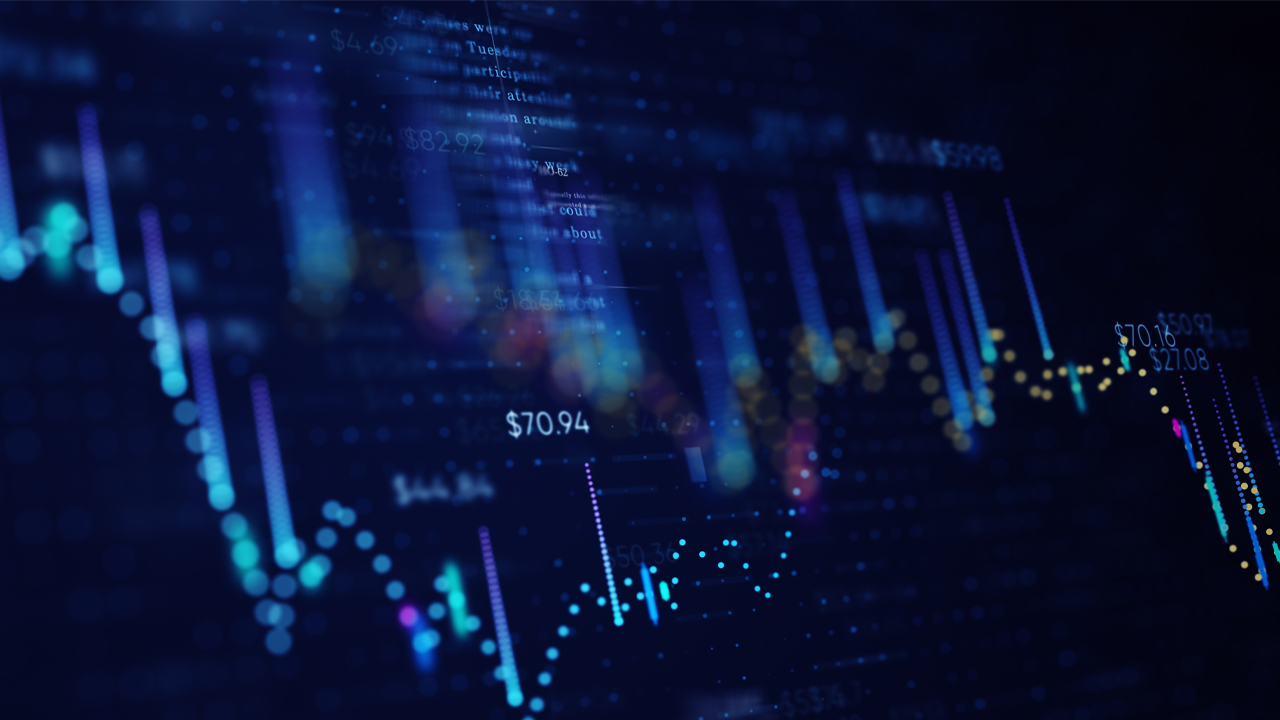

<p style="background-color:skyblue;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> ~🌐 Financial Data Science 🌐~ </p>
<font size="3">

**Financial Data Science** is a multidisciplinary field that integrates finance, statistics, and computer science to uncover valuable insights, patterns, and predictions from financial data. By employing advanced analytical and computational methods, it enables professionals to analyze extensive and intricate financial datasets. 

The primary objective is to facilitate informed decision-making, mitigate risks, and drive value creation in various business contexts. With its focus on harnessing the power of data, Financial Data Science plays a crucial role in shaping the future of finance and driving innovation in the industry.

<p style="background-color:indigo;color:white;font-size:25px;text-align:center;border-radius:10px 10px;"> 🔰 ADVANCED DATA VISUALIZATION TECHNIQUES 🔰 </p>
<font size="3">

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 📖 INTRODUCTION 📖 <span style='font-size:28px; background-color:blue ;'>  </span></p>

> **Use a picture. It's worth a thousand words. 
    ~Arthur Brisbane (1911).** ✨


📍 This notebook project focuses on three important visualization techniques: static 3D plotting, interactive 2D plotting, and financial plots.

- **Static 3D Plotting** allows us to visualize data in three dimensions, revealing complex relationships within financial datasets. 

- **Interactive 2D Plotting** enhances the visualization experience by providing dynamic and interactive representations that empower users to explore data in more detail. 

- **Financial Plots**, specifically tailored for financial data, offer intuitive views of market trends and key metrics.

Through this project, we aim to showcase how these techniques can be applied in data science to gain insights and effectively communicate financial information. 

By leveraging tools such as Matplotlib and Plotly, we can create visually engaging visualizations that facilitate decision-making and enhance our understanding of financial datasets. 

Let's dive into this visual journey to unlock the potential of data visualization in the realm of finance. 😉🥂

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 〽️ STATIC 3D PLOTTING 〽️ <span style='font-size:28px; background-color:blue ;'>  </span></p>

To begin, we need to import the required libraries for our plotting tasks. We will use numpy for numerical computations and matplotlib.pyplot for creating the plots. These libraries provide a range of functions and methods that allow us to generate and customize our visualizations.

In [2]:
# Suppressing a warning 
import warnings
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline

# Import np with the usual abbreviation np
import numpy as np

# Import mlp with the usual abbreviation mlp
import matplotlib as mpl

# The version of mpl used
mpl.__version__

# Import the main plotting (sub)package with the usual abbreviation plt
import matplotlib.pyplot as plt

# Set the plotting style to seaborn
mpl.style.use('seaborn')

# Set the front to be serif in all plots
mpl.rcParams['font.family'] = 'serif'

import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 

import seaborn as sns
# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("white")
#styledict, or one of {darkgrid, whitegrid, dark, white, ticks}

**Static 3D Plots** are frequently utilized in the representation of **Volatility Surfaces**, which exhibit implied volatilities across various time-to-maturity and strike levels of traded options. 

In fact, this graphical visualization enables a comprehensive understanding of the volatility dynamics within the financial market, providing valuable insights for option pricing and risk management.

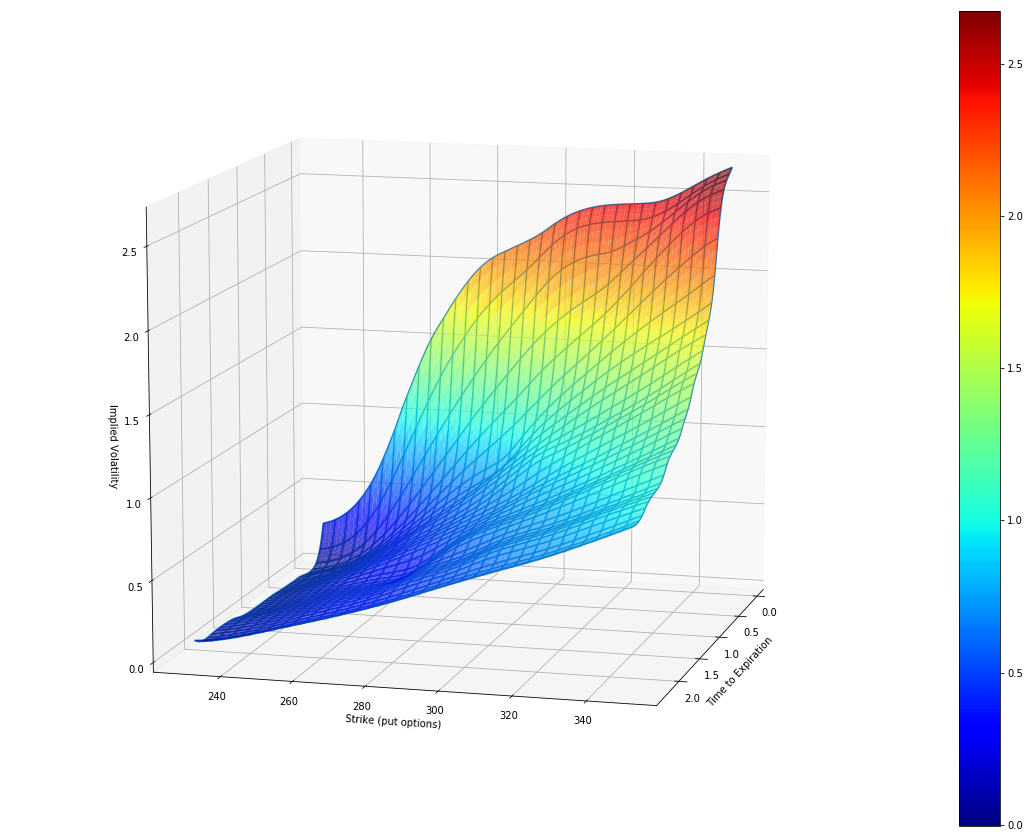

**Source**: [HISTORICAL VOLATILITY AND IMPLIED VOLATILITY, QUANTCONNECT](https://www.quantconnect.com/learning/articles/introduction-to-options/historical-volatility-and-implied-volatility)

We will try, artificially, to reproduce this volatility surface using the pachage matplotlib. 

We consider the parameters:
    
    - Strike values between 50 and 150
    
    - Times-to-maturity between 0.5 and 2.5 years 

In [3]:
# Define an array of strike prices ranging from 50 to 150 with 24 points
strike = np.linspace(50, 150, 24)

# Define an array of time-to-maturity values ranging from 0.5 to 2.5 with 24 points
ttm = np.linspace(0.5, 2.5, 24)

# Create a meshgrid of strike and ttm arrays to generate a grid of values
strike, ttm = np.meshgrid(strike, ttm)

# Access the third column of the strike array and round the values to one decimal place
strike[:, 2].round(1)


array([58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7,
       58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7, 58.7,
       58.7, 58.7])

The **Implied Volatility** formula is given by:

$$\text{iv} = \frac{(\text{strike} - 100)^2}{100 \times \text{strike} \times \text{ttm}}$$

In [4]:
# Calculate implied volatilities using the given formula
iv = (strike - 100) ** 2 / (100 * strike) / ttm

# Access the first 5 rows and first 3 columns of the iv array
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

In this code, we calculate implied volatilities (iv) based on the given formula using the strike and ttm arrays. The result is a grid of implied volatility values corresponding to different combinations of strike prices and time-to-maturity. 

The last line of code accesses the first 5 rows and first 3 columns of the iv array, providing a subset of the calculated implied volatilities.

Now, let's plot the volatility surface.

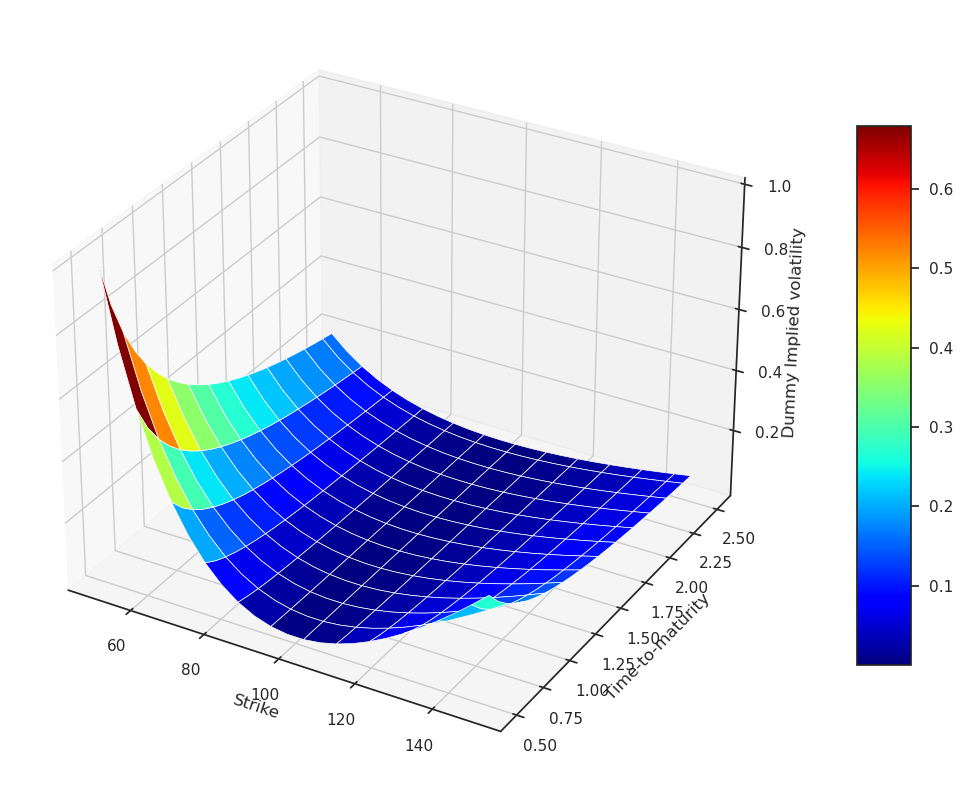

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure with a size of 20x10
fig = plt.figure(figsize=(20, 10))

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with the given strike, ttm, and iv data
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, 
                       cmap=plt.cm.jet, linewidth=0.5, antialiased=True)

# Set the label for the x-axis
ax.set_xlabel('Strike')

# Set the label for the y-axis
ax.set_ylabel('Time-to-maturity')

# Set the label for the z-axis
ax.set_zlabel('Dummy Implied volatility')

# Add a colorbar to the plot
fig.colorbar(surf, shrink=0.7, aspect=10)


In some cases, when actual option prices or market data are not available, or when performing hypothetical calculations or simulations, dummy implied volatility values may be used as a substitute. These dummy values are arbitrary and are often chosen based on assumptions or predetermined criteria for the purpose of analysis or modeling.



Let's plot the same data but now as a 3D scatter plot with a different viewing angle.

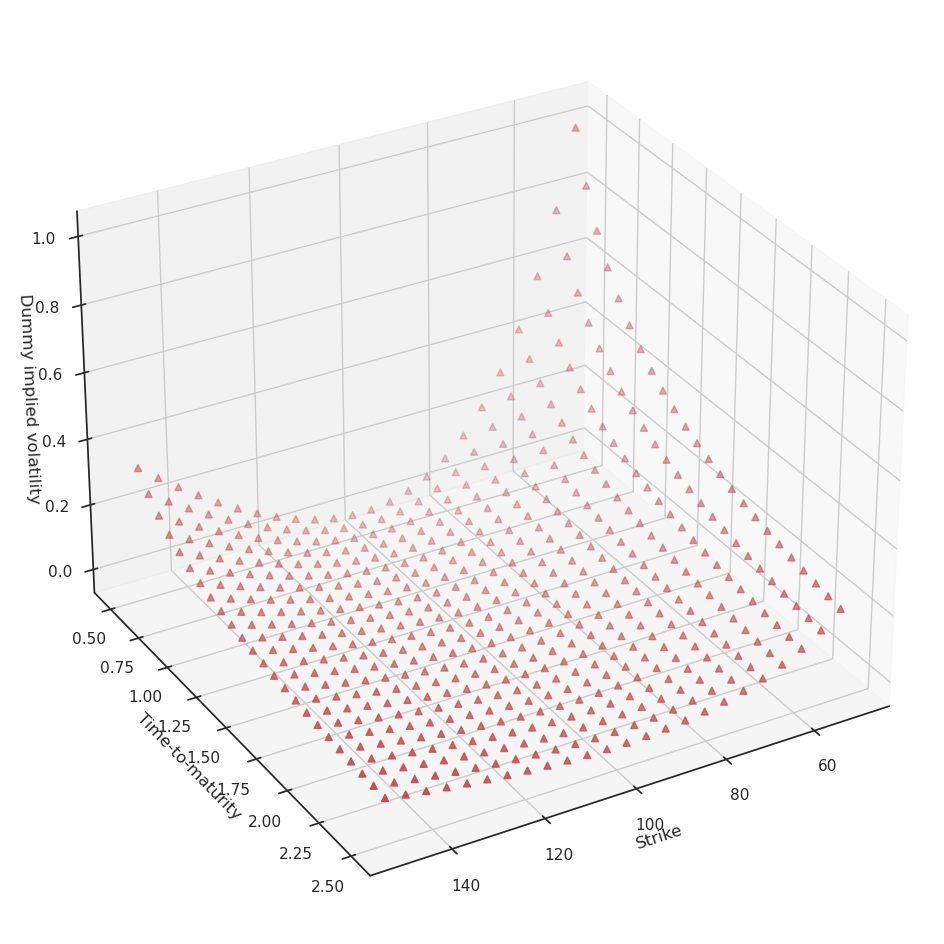

In [6]:
# Create a new figure with a size of 20x10
fig = plt.figure(figsize=(18, 12))

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir = 'z', s = 25, c = 'r', marker = '^')

# Set the label for the x-axis
ax.set_xlabel('Strike')

# Set the label for the y-axis
ax.set_ylabel('Time-to-maturity')

# Set the label for the z-axis
ax.set_zlabel('Dummy implied volatility')

# Add a colorbar to the plot
fig.colorbar(surf, shrink=0.7, aspect=10)

Nice ! ✨

Let's move to the second section of this project.

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 〽️ INTERACTIVE 2D PLOTTING 〽️ <span style='font-size:28px; background-color:blue ;'>  </span></p>

**Plotly** is a powerful data visualization library widely used in data science for creating interactive and dynamic visualizations. It offers a range of features and capabilities that enable users to create highly customizable and interactive plots, charts, and dashboards.

**Cufflinks** is a library that simplifies interactive data visualization in data science projects. It works with **Pandas** and **Plotly** to create interactive plots directly from dataframes with minimal code. It offers a range of chart types and customization options, making it efficient for rapid exploration and communication of insights.

We will make use of these two libraries in what follows.

This code imports the required libraries and initializes Plotly in notebook mode to enable interactive Plotly charts to be displayed directly within the our notebook.

In [7]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

# Initialize Plotly in notebook mode
plyo.init_notebook_mode(connected=True)

This code generates random data using NumPy, creates a date range for the index using pd.date_range, and creates a DataFrame df with the random data, specified column names, and the generated index. 

Finally, it displays the first few rows of the DataFrame using the *head()* function.

In [8]:
# Generate random data
a = np.random.standard_normal((250, 5)).cumsum(axis=0)

# Create a date range for the index
index = pd.date_range('2019-1-1', freq='B', periods=len(a))

# Create a DataFrame with the random data
df = pd.DataFrame(100 + 5 * a, columns=list('abcde'), index=index)

# Display the first few rows of the DataFrame
df.head()

,a,b,c,d,e
2019-01-01,102.796466,96.139144,98.691771,100.105046,97.587341
2019-01-02,102.024745,103.038899,100.932105,105.586029,103.212260
2019-01-03,98.249118,100.781208,107.598767,102.781809,96.413450
2019-01-04,106.898018,106.288847,107.513549,102.740936,92.804322
2019-01-07,109.709077,99.160728,99.892934,104.904755,95.827528


The code below uses the iplot function from cufflinks to generate an interactive plot of the DataFrame df. It then uses plyo.iplot from plotly.offline to display the plot in the notebook. Additionally, it saves the plot as a PNG image with the specified filename.

In [9]:
# Generate the interactive plot as a figure
figure = df.iplot(asFigure=True)

# Display the interactive plot
plyo.iplot(figure, image='png', filename='ply_01')

I love what I see! it's just wonderful !❤️‍🔥

Let's keep playing around !

The following code generates an interactive plot using the iplot function from Plotly's Cufflinks library. The plot shows columns 'a' and 'b' from the DataFrame df. It is displayed with the 'polar' theme, has a title, and the x-axis is labeled as 'date' while the y-axis is labeled as 'value'. The 'a' column is represented as markers, the 'b' column is represented as lines with markers, and each column has different marker symbols and colors. The resulting plot is both displayed interactively and saved as a PNG image with the filename 'ply_02'.

In [10]:
# Generate an interactive plot of columns 'a' and 'b' from the DataFrame
plot = df[['a', 'b']].iplot(asFigure=True,  # Return the plot as a Figure object
                            theme='polar',  # Set the plot theme to 'polar'
                            title='A Time Series Plot',  # Set the plot title
                            xTitle='Date',  # Set the x-axis label
                            yTitle='Value',  # Set the y-axis label
                            mode={'a': 'markers', 'b': 'lines+markers'},  # Set the plot mode for each column
                            symbol={'a': 'circle', 'b': 'diamond'},  # Set the symbol for each column
                            size=3.5,  # Set the marker size
                            colors={'a': 'blue', 'b': 'magenta'}  # Set the colors for each column
                            )

# Display the interactive plot and save it as a PNG image
plyo.iplot(plot, image='png', filename='ply_02')


**Cufflinks** provides various plotting types that can be used to visualize data. Some of the available plotting types in Cufflinks include:

- Line plots (line)
- Scatter plots (scatter)
- Bar plots (bar)
- Box plots (box)
- Histograms (histogram)
- Heatmaps (heatmap)
- Surface plots (surface)
- Bubble plots (bubble)
- 3D scatter plots (scatter3d)
- Pie charts (pie)
- Area plots (area)
- Violin plots (violin)
- Box plots grouped by category (boxgroup)
- Density plots (density)
- Error bars plots (error)
- Subplots (subplot)


These are just a few examples of the available plotting types in Cufflinks. Each plotting type has its own set of parameters and customization options to create visually appealing and informative plots.

Let's try out to plot histograms.

In [11]:
# Generate a histogram plot for each column as subplots
histogram_plot = df.iplot(kind='hist', subplots=True, bins=15, asFigure=True)

# Display the interactive plot using Plotly's iplot function
plyo.iplot(histogram_plot, image='png', filename='ply_03')

Histograms per column of the DataFrame, closing this section :)

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 〽️ FINANCIAL PLOTS 〽️ <span style='font-size:28px; background-color:blue ;'>  </span></p>

Indeed, the combination of Plotly, Cufflinks, and Pandas offers a powerful toolkit for working with financial time series data.

Plotly provides interactive and visually appealing plots, Cufflinks simplifies the process of creating Plotly visualizations from Pandas data structures, and Pandas offers flexible and efficient data manipulation capabilities.

This powerful trio allows data scientists and analysts to seamlessly explore, analyze, and communicate financial time series data, enabling them to gain valuable insights, identify patterns, and make informed decisions in the domain of finance.

Let's use a real financial time series data. Let's use two different datasets !

### ☞ EURO/USD Historical Prices from 03/27/23 to 06/25/23

In [12]:
# Read the CSV file "HistoricalPrices.csv" and store it in the DataFrame 'raw1'
raw1 = pd.read_csv("/kaggle/input/eurousd-historical-prices-data/HistoricalPrices.csv")

# Display information about the DataFrame 'raw1'
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    65 non-null     object 
 1    Open   65 non-null     float64
 2    High   65 non-null     float64
 3    Low    65 non-null     float64
 4    Close  65 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


In [13]:
# Display the first few rows of the DataFrame 'raw'
raw1.head()

,Date,Open,High,Low,Close
0,06/23/23,1.0958,1.0971,1.0844,1.0895
1,06/22/23,1.0986,1.1013,1.0949,1.0956
2,06/21/23,1.0920,1.0994,1.0906,1.0990
3,06/20/23,1.0922,1.0949,1.0893,1.0919
4,06/19/23,1.0967,1.0967,1.0908,1.0924


In [14]:
# Set the 'Dates' column as the index of the DataFrame
raw1['Date'] = pd.to_datetime(raw1['Date'])
raw1.set_index('Date', inplace=True)

# Create a QuantFig object with the given parameters
qf = cf.QuantFig(raw1, title='EURO/USD Historical Prices from 03/27/23 to 06/25/23', 
                 legend='top', name='Stock Price', color='#FF0000')

# Add Bollinger Bands to the plot
qf.add_bollinger_bands(periods=20)

# Generate the plot as a Plotly figure
fig = qf.iplot(asFigure=True, xTitle='Date')

# Enable the x-axis range slider
fig['layout']['xaxis']['rangeslider']['visible'] = True

# Increase the size of the figure
fig['layout']['width'] = 1250
fig['layout']['height'] = 500

# Display the interactive plot
plyo.iplot(fig, image='png', filename='qf_031')


### ☞ Microsoft Stock Information from 04/01/2015 to 04/01/2021

In [15]:
# Read the CSV file "HistoricalPrices.csv" and store it in the DataFrame 'raw'
raw2 = pd.read_csv("/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv")

# Display information about the DataFrame 'raw'
raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [16]:
# Display the first few rows of the DataFrame 'raw'
raw2.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [17]:
# Set the 'Dates' column as the index of the DataFrame
raw2['Date'] = pd.to_datetime(raw2['Date'])
raw2.set_index('Date', inplace=True)

# Create a QuantFig object with the given parameters
qf = cf.QuantFig(raw2, title='Microsoft Stock Information from 04/01/2015 to 04/01/2021', 
                 legend='top', name='Stock Price', color='#FF0000')

# Add Bollinger Bands to the plot
qf.add_bollinger_bands(periods=20)

# Add volume to the plot
qf.add_volume(column='Volume')  # Modify 'Volume' to the actual column name

# Generate the plot as a Plotly figure
fig = qf.iplot(asFigure=True, xTitle='Date')

# Enable the x-axis range slider
fig['layout']['xaxis']['rangeslider']['visible'] = True

# Increase the size of the figure
fig['layout']['width'] = 1250
fig['layout']['height'] = 500

# Display the interactive plot
plyo.iplot(fig, image='png', filename='qf_01')


What a happy end ! 😊
The best is yet to come ! 🥂

 ♟ **References:**

- [Python for Finance, 2nd Edition, by Yves Hilpisch (O'Reilly). Copyritght 2019 Yves Hilpisch, 978-1-492-02433-0](https://www.amazon.com/Python-Finance-Mastering-Data-Driven/dp/1492024333)

- [ChatGPT](https://openai.com/blog/chatgpt) 